In [4]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.7, 31.0,
                31.5, 32.0, 33.0, 33.5, 34.0, 34.5, 35.0 ,36.0, 37.0, 38.5,
                38.0, 39.0, 39.5, 30.0, 30.7, 31.0, 31.5, 32.0, 33.0, 33.5,
                34.0, 34.5, 35.0 ,36.0, 37.0,9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2,
                 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0,
                475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0,
                575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0,
                920.0, 955.0, 925.0, 975.0, 950.0,6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4,
                 12.2, 19.7, 19.9]

In [ ]:
import numpy as np

fish_data = np.column_stack((fish_length, fish_weight))
fish_target = np.concatenate((np.ones(35), np.zeros(14)))
#fish_data

In [19]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, random_state=42)

(36, 2)
(13, 2)
(36,)
(13,)


In [21]:
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify=fish_target, random_state=42)

test_target

array([0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1.])

In [24]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [25]:
kn.predict([[25,150]])

array([0.])

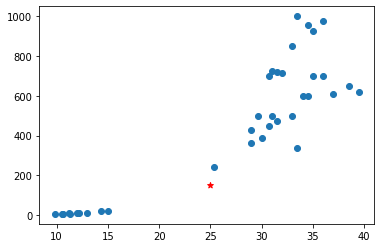

In [29]:
import matplotlib.pyplot as plt

plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25,150, marker='*' , c='r')
plt.show()

In [33]:
distances, indices = kn.kneighbors([[25,150]])

print(indices)
print(distances)
print(train_input[indices])
print(train_target[indices])

[[21 33 19 30  1]]
[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]
[[[ 25.4 242. ]
  [ 15.   19.9]
  [ 14.3  19.7]
  [ 13.   12.2]
  [ 12.2  12.2]]]
[[1. 0. 0. 0. 0.]]


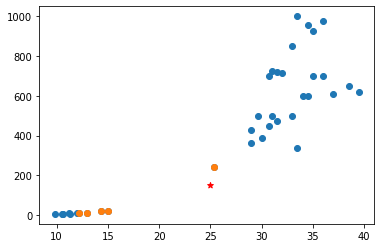

In [34]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25,150, marker='*' , c='r')
plt.scatter(train_input[indices,0], train_input[indices,1])
plt.show()

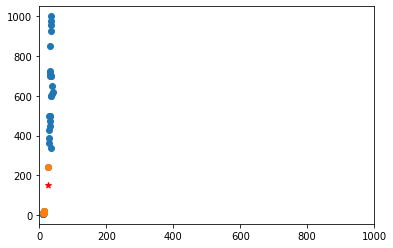

In [36]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25,150, marker='*' , c='r')
plt.scatter(train_input[indices,0], train_input[indices,1])
plt.xlim((0,1000))
plt.show()

In [39]:
mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)

print(mean, std)

[ 27.06666667 454.09722222] [  9.75616614 323.29893931]


In [40]:
train_scaled = (train_input - mean) / std

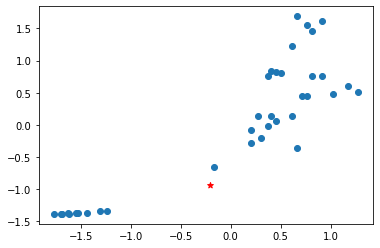

In [44]:
new = ([25,150]-mean) / std
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0],new[1], marker='*' , c='r')
plt.show()

In [45]:
kn2 = KNeighborsClassifier()
kn2.fit(train_scaled, train_target)

test_scaled = (test_input - mean) / std
kn2.score(test_scaled, test_target)

1.0

In [47]:
kn2.predict([new])
distances, indices = kn2.kneighbors([new])

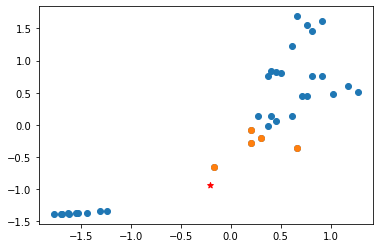

In [48]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0],new[1], marker='*' , c='r')
plt.scatter(train_scaled[indices,0], train_scaled[indices,1])
plt.show()

In [9]:
a = np.ones(5)
b = np.zeros(5)

print(a,b)

[1. 1. 1. 1. 1.] [0. 0. 0. 0. 0.]


In [10]:
np.concatenate((a,b))

array([1., 1., 1., 1., 1., 0., 0., 0., 0., 0.])

In [12]:
np.row_stack((a,b))

array([[1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0.]])

In [13]:
np.column_stack((a,b))

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [14]:
c = [[1,2,3], [4,5,6]]
d = [[7,8,9], [10,11,12]]

print(np.concatenate((c,d), 0))
print(np.concatenate((c,d), 0).shape)

print(np.concatenate((c,d),1))
print(np.concatenate((c,d),1).shape)

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
(4, 3)
[[ 1  2  3  7  8  9]
 [ 4  5  6 10 11 12]]
(2, 6)
